# Machine Learning on Graphs - Homework 1
## Mohammad Bahrami - 9724133

In [1]:
import numpy as np
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt

## Question 1

In [2]:
adj = np.array(
    [[0 , 1 , 0 , 1 , 0 , 0 , 1],
    [1 , 0 , 1 , 0 , 1 , 0 , 0],
    [0 , 1 , 0 , 0 , 0 , 1 , 0],
    [1 , 0 , 0 , 0 , 0 , 0 , 1], 
    [0 , 1 , 0 , 0 , 0 , 1 , 1], 
    [0 , 0 , 1 , 0 , 1 , 0 , 1], 
    [1 , 0 , 0 , 1 , 1 , 1 , 0]]
)

In [3]:
evalues, evecs = np.linalg.eig(adj)

In [4]:
adj @ (evecs.T[0].reshape((-1,1)))

array([[-1.14939114],
       [-1.05191112],
       [-0.74384091],
       [-0.88522892],
       [-1.24363517],
       [-1.16627074],
       [-1.49041893]])

In [5]:
XX = evalues[0]*evecs.T[0].reshape((-1,1))

In [6]:
X = np.ones((7,1))
for i in range(1000):
    X = adj@ X / np.max(evalues)

In [7]:
X

array([[0.99919975],
       [0.91445748],
       [0.64664292],
       [0.7695557 ],
       [1.08112887],
       [1.01387368],
       [1.2956653 ]])

In [8]:
XX / X

array([[-1.15031168],
       [-1.15031168],
       [-1.15031168],
       [-1.15031168],
       [-1.15031168],
       [-1.15031168],
       [-1.15031168]])

we see that the vector found by the centrality algorithm is a linear coefficient of the vector created by $ \lambda_1 v_1 $

## Question 2

### Part 1

In [9]:
for i in range(10):
    G = nx.erdos_renyi_graph(50, 0.5)
    A = nx.to_numpy_array(G)
    eigval = max(np.linalg.eig(A)[0])
    max_degree = np.max(np.array(G.degree)[:,1])
    print(f"Graph: {i+1} - Eigen Value: {eigval:.3f} - Max Degree: {max_degree}")

Graph: 1 - Eigen Value: 24.635 - Max Degree: 30
Graph: 2 - Eigen Value: 25.168 - Max Degree: 33
Graph: 3 - Eigen Value: 24.330 - Max Degree: 31
Graph: 4 - Eigen Value: 23.573 - Max Degree: 30
Graph: 5 - Eigen Value: 25.017 - Max Degree: 33
Graph: 6 - Eigen Value: 26.058 - Max Degree: 35
Graph: 7 - Eigen Value: 25.555 - Max Degree: 32
Graph: 8 - Eigen Value: 25.020 - Max Degree: 32
Graph: 9 - Eigen Value: 25.733 - Max Degree: 32
Graph: 10 - Eigen Value: 25.046 - Max Degree: 33


we can see that the largest eigen value is always smaller than the largest node degree in these random graphs

### Part 2

In [10]:
for i in range(10):
    G = nx.algorithms.bipartite.generators.random_graph(5, 5, 0.5)
    A = nx.to_numpy_array(G)
    eigvals = np.linalg.eig(A)[0]
    print(f"Graph: {i+1} - Eigen Values: {np.round(eigvals, 3)} \n{'-'*50}")

Graph: 1 - Eigen Values: [ 3.366 -3.366  1.271  0.234 -0.234 -1.271  1.    -1.    -1.     1.   ] 
--------------------------------------------------
Graph: 2 - Eigen Values: [-3.357  3.357 -1.644  1.644 -0.877 -0.506  0.877  0.506  0.     0.   ] 
--------------------------------------------------
Graph: 3 - Eigen Values: [-2.683  2.683 -1.831  1.831 -0.919 -0.715 -0.31   0.31   0.919  0.715] 
--------------------------------------------------
Graph: 4 - Eigen Values: [ 3.549+0.j -3.549+0.j  1.628+0.j -1.628+0.j  0.726+0.j  0.477+0.j
 -0.477+0.j -0.726+0.j  0.   +0.j  0.   -0.j] 
--------------------------------------------------
Graph: 5 - Eigen Values: [-2.59   2.59  -1.357 -1.122  1.357  1.122 -0.439  0.439  0.     0.   ] 
--------------------------------------------------
Graph: 6 - Eigen Values: [-2.845  2.845 -1.498 -0.813  1.498  0.813 -1.     0.    -0.     1.   ] 
--------------------------------------------------
Graph: 7 - Eigen Values: [-3.3    3.3   -1.38  -1.252 -0.765 -0.2

we can observe that for each eigen value $\lambda$ in the values, $-\lambda$ is also in the eigen values.

### Part 3
To find the number of paths of length $k$ from the adjacency matrix, we raise the adjacency matrix to the pawer of $k$. Then, the $A_{i,j}^{k}$ is the count of paths of length $k$ in the matrix A.

As a result, to find paths of length $3$ between each $2$ nodes, we raise adjacency matrix `adj` to the power of $3$. Then, to count all the paths of length $3$ we sum up all the elements of $A^3$.

In [11]:
A3 = np.linalg.matrix_power(adj, 3)
paths_l3 = np.sum(A3)
print(f"Number of Paths of length 3 in A: {paths_l3}")

Number of Paths of length 3 in A: 178


### Part 4
We want the distinct paths of length 3 that start and end in the same node. To find them, first we raise the `adj` to the power of $3$, then we sum the values in the main diameter. This gives us the count of all paths of length $3$ that start and end in the same node, but there is a catch, as the order neither of the nodes that we visit nor the start and end node (which are the same) matter to us, and we only want the number of distinct triangles in the graph. we need to first divide the number that we found by $2$ to account for the paths like $(i \to j \to k \to i)$, $(i \to k \to j \to i)$ that has the same start and end point but take a different path to make the same triangle and then we need to divide the result by $3$ to account for the nodes that create the same triangle but we count it $3$ times because we are summing over all the nodes of main diameter and each one of them can be the starting point of the triangle's path.

In [12]:
A3_eyed = np.eye(adj.shape[0]) * np.linalg.matrix_power(adj, 3) 
trig_count = np.sum(A3_eyed) // 6
print(f"Number of Triangles A: {trig_count}")

Number of Triangles A: 2.0


### part 5
To count the number of squares in a graph, we need to calculate $\binom{A^2_{i,j}}{2}$ for each $i,j$ that $i<j$.
This is because we want to choose $2$ different paths of length $2$ between $i,j$ but we don't want paths that start and end in the same location (the main diameter) and also we don't want to count paths once from one way and once from the other way around, so we eliminate the other way around (below main diameter). So we go through every element of the adjacency matrix that is above the main diameter and calculate the above equation and sum all the results. One more little point is that we count each square two times this way (nodes that are neighbors may form the same square but are counted two times) so we divide the result by 2.

In [13]:
A2 = np.linalg.matrix_power(adj, 2)
double_of_squares = 0
for i in range(A2.shape[0]):
    for j in range(A2.shape[1]):
        if j > i:
            double_of_squares += A2[i][j] * (A2[i][j] - 1) // 2
print(f"Number of Squares A: {double_of_squares // 2}")

Number of Squares A: 2


### Part 6
It seems that these two graphs are isomorphic.

In [14]:
P = np.array([
    [1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0]
])

A1 = np.array([
    [0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0]
])

A2 = np.array([
    [0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0]
])

In [29]:
np.all(P @ A1 @ np.linalg.inv(P) == A2)

True

We can see that $PA_1P^{-1}$ is equal to A_2

## Question 4

In [16]:
def betweennessCentrality(A):
    A = np.array(A)
    Betweenness = np.zeros(A.shape[0])
    for i in range(A.shape[0]):
        parent = [[] for i in range(A.shape[0])]
        stack = deque()
        queue = deque()
        sp_count = np.zeros(A.shape[0])
        sp_count[i] = 1
        distance = np.array([-1] * A.shape[0])
        distance[i] = 0
        dependency = np.zeros(A.shape[0])
        queue.append(i)
        while len(queue) != 0:
            v = queue.popleft()
            stack.append(v)
            v_neighbors = A[v].nonzero()[0]
            for j in v_neighbors:
                if distance[j] < 0:
                    queue.append(j)
                    distance[j] = distance[v] + 1
                if distance[j] == distance[v] + 1:
                    sp_count[j] = sp_count[j] + sp_count[v]
                    parent[j].append(v)
        while len(stack) != 0:
            w = stack.pop()
            for v in parent[w]:
                dependency[v] += sp_count[v] / sp_count[w] * (1 + dependency[w])
            if i != w:
                Betweenness[w] += dependency[w]
    return Betweenness.reshape((-1, 1)) / np.linalg.norm(Betweenness)

We put each node of the graph to be the source of the centrality and calculate that nodes centrality and repeat this for every node then we have all the nodes' centralities. 

In [17]:
mb = betweennessCentrality(adj)
mb

array([[0.35634832],
       [0.4454354 ],
       [0.08908708],
       [0.        ],
       [0.17817416],
       [0.35634832],
       [0.71269665]])

In [18]:
nb = nx.centrality.betweenness_centrality(nx.from_numpy_matrix(adj))
nb = np.array(list(nb.values())).reshape((-1, 1))
nb

array([[0.13333333],
       [0.16666667],
       [0.03333333],
       [0.        ],
       [0.06666667],
       [0.13333333],
       [0.26666667]])

In [19]:
mb / nb

/tmp/ipykernel_59756/410580493.py:1: RuntimeWarning: invalid value encountered in true_divide
  mb / nb


array([[2.67261242],
       [2.67261242],
       [2.67261242],
       [       nan],
       [2.67261242],
       [2.67261242],
       [2.67261242]])

as we can see, our centrality and networkx's centrality are a linear coefficient of each other.(basically are the same)

### Time Complexity
In this implementation, the stack and the queue have $O(1)$ complexity.
The main `for` is repeated ($n=$ `number of nodes`) times.
The first internal while is a simple BFS which takes $O(m)$ ($m=$ `number of edges`)
The second while also takes $O(m)$
The final time complexity will be:
$$O(n \times (m + m)) = O(nm)$$

## Question 5

In [20]:
max_nodes = 1000
added_nodes = 3
G1 = nx.erdos_renyi_graph(max_nodes, 0.1)
G2 = nx.erdos_renyi_graph(10, 0.4)

In [21]:
for i in range(10, max_nodes):
    adj_mat = nx.to_numpy_array(G2)
    p = np.sum(adj_mat, axis=0) / np.sum(adj_mat)
    nodes = np.random.choice(
        np.arange(p.shape[0]),
        p=p,
        size=added_nodes,
        replace=False
    )
    G2.add_node(i)
    G2.add_edges_from(
        [(i, node) for node in nodes]
    )

### Diameter

In [22]:
G1_diam = nx.distance_measures.diameter(G1)
G2_diam = nx.distance_measures.diameter(G2)
print(f"G1 Diameter: {G1_diam} - G2 Diameter: {G2_diam}")

G1 Diameter: 3 - G2 Diameter: 6


In $G_1$ the nodes are more centered and more dense as there is usually no more than $3$ intermediary nodes between two distinct nodes. Whereas in $G_2$ there are more intermediary nodes between two distinct nodes.

### Clustering coefficient

In [23]:
G1_clus = nx.cluster.average_clustering(G1)
G2_clus = nx.cluster.average_clustering(G2)
print(f"G1 Avg Clustering Coefficient: {G1_clus:.5f} \nG2 Avg Clustering Coefficient: {G2_clus:.5f}")

G1 Avg Clustering Coefficient: 0.10027 
G2 Avg Clustering Coefficient: 0.03080


This is lower in $G_2$ because new nodes try to connect to the more famous nodes and avoid the lonely ones. so there are less neighbors for each node of $G_2$ for a constant size of potential neighbors in both graphs.

### Closeness Centrality

In [24]:
G1_clos = nx.centrality.closeness_centrality(G1)
G2_clos = nx.centrality.closeness_centrality(G2)
print(f"G1 Avg Closeness Centrality: {np.mean(list(G1_clos.values()))} \nG2 Avg Closeness Centrality: {np.mean(list(G2_clos.values()))}")

G1 Avg Closeness Centrality: 0.5263360752714041 
G2 Avg Closeness Centrality: 0.2864637566575686


This value shows the average potential of a node being the center of graph. For $G_1$ this value is bigger because the total number of nodes that have bigger degrees is higher.

### Optionals

Plotting the distribution of $G_1$'s degrees 

In [25]:
# set to remove nodes below this limiter in the plots 
# (set same as d0 to view d0 effects)
plot_limiter = 0

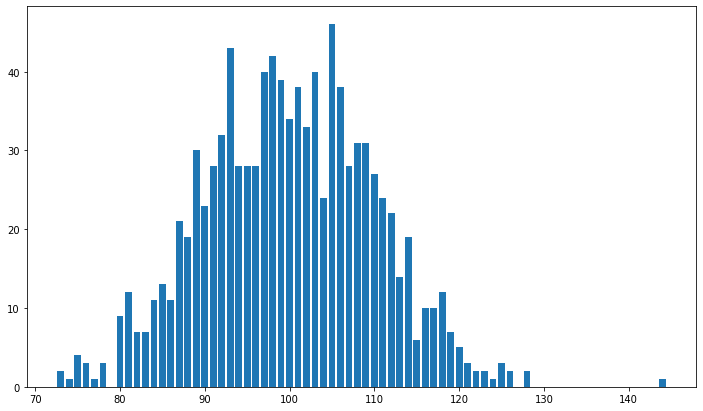

In [26]:
G1_deg_dist = np.unique(np.array(G1.degree)[:,1], return_counts=True)
plt.bar(G1_deg_dist[0][G1_deg_dist[0] >= plot_limiter], G1_deg_dist[1][G1_deg_dist[0] >= plot_limiter])
plt.gcf().set_size_inches(12, 7)

Plotting the distribution of $G_2$'s degrees 

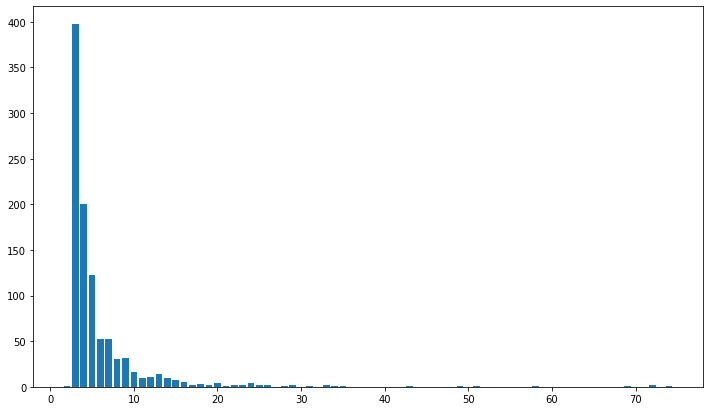

In [27]:
G2_deg_dist = np.unique(np.array(G2.degree)[:,1], return_counts=True)
plt.bar(G2_deg_dist[0][G2_deg_dist[0] >= plot_limiter], G2_deg_dist[1][G2_deg_dist[0] >= plot_limiter])
plt.gcf().set_size_inches(12, 7)

In [28]:
d0 = 70
G1_sum_abv_d0 = np.sum(G1_deg_dist[1][G1_deg_dist[0] >= d0])
G2_sum_abv_d0 = np.sum(G2_deg_dist[1][G2_deg_dist[0] >= d0])
print(f"Nodes above d0 in G1: {G1_sum_abv_d0}")
print(f"Nodes above d0 in G2: {G2_sum_abv_d0}")

Nodes above d0 in G1: 1000
Nodes above d0 in G2: 3


We can see that in $G_1$ almost every node has a degree over $70$ nut in $G_2$ this number is vary close to $0$. so the number of famous nodes in $G_2$ is small and the edges has been distributed in many of other nodes, but in $G_1$ most of the nodes are in the same level and close to average. which means there are no famous or non-famous nodes in $G_1$ and they are normally distributed.